# What it is?
The data of total COVID-19 confirmed cases worldwide from 2020.01.22 to 2020-07-27.
# Source
https://www.kaggle.com/imdevskp/corona-virus-report?select=covid_19_clean_complete.csv
# Questions
1. How many people recovered from covid up to July 4th, 2020 in the US?
2. When did Singapore reached 5000 confirmed cases?






# Code
Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load Data

In [2]:
df = pd.read_csv('covid_19_clean_complete.csv')
print(df)

      Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  R

Index:

In [3]:
print(df.index.values)

[    0     1     2 ... 49065 49066 49067]


Columns:

In [4]:
print(df.columns.values)

['Province/State' 'Country/Region' 'Lat' 'Long' 'Date' 'Confirmed'
 'Deaths' 'Recovered' 'Active' 'WHO Region']


Rough overview

In [5]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


Generate the pivot table  
(index by date, columns are country-specific number of confirmed cases)

In [6]:
df_pivot = pd.pivot_table(df, values='Confirmed', index=['Date'], columns=['Country/Region'], aggfunc=np.sum)
print(df_pivot)

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
Date                                                             
2020-01-22                0        0        0        0       0   
2020-01-23                0        0        0        0       0   
2020-01-24                0        0        0        0       0   
2020-01-25                0        0        0        0       0   
2020-01-26                0        0        0        0       0   
...                     ...      ...      ...      ...     ...   
2020-07-23            35928     4466    25484      889     851   
2020-07-24            35981     4570    26159      897     880   
2020-07-25            36036     4637    26764      897     916   
2020-07-26            36157     4763    27357      897     932   
2020-07-27            36263     4880    27973      907     950   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
Date                                                          

Limit countries to US, Russia, China, UK, and France

In [7]:
df_pivot_five_country = df_pivot[['US', 'Russia', 'China', 'United Kingdom', 'France']]
print(df_pivot_five_country)

Country/Region       US  Russia  China  United Kingdom  France
Date                                                          
2020-01-22            1       0    548               0       0
2020-01-23            1       0    643               0       0
2020-01-24            2       0    920               0       2
2020-01-25            2       0   1406               0       3
2020-01-26            5       0   2075               0       3
...                 ...     ...    ...             ...     ...
2020-07-23      4038816  793720  86045          298731  216667
2020-07-24      4112531  799499  86202          299500  217797
2020-07-25      4178970  805332  86381          300270  217801
2020-07-26      4233923  811073  86570          301020  217801
2020-07-27      4290259  816680  86783          301708  220352

[188 rows x 5 columns]


Plot the pivot table

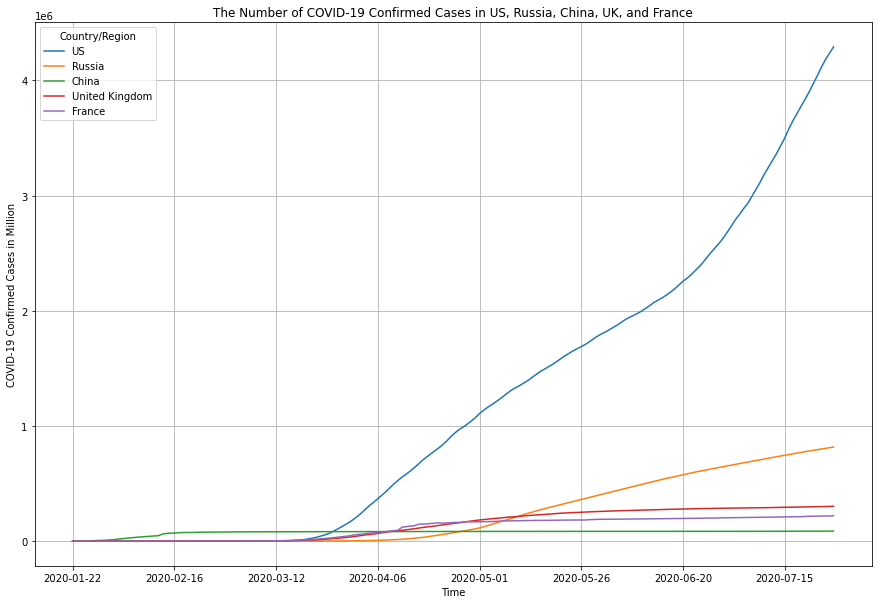

In [8]:
df_pivot_five_country.plot(figsize=(15,10))
plt.xlabel('Time')
plt.ylabel('COVID-19 Confirmed Cases in Million')
plt.title('The Number of COVID-19 Confirmed Cases in US, Russia, China, UK, and France')
plt.grid()

Generate group data  
(group by regions, lastest (up to 2020-07-27) total confirmed cases in different regions of the world)

In [9]:
df_regions = df[df['Date'] == '2020-07-27'].groupby('WHO Region')['Confirmed'].agg(sum).sort_values(ascending=False)
print(df_regions)

WHO Region
Americas                 8839286
Europe                   3299523
South-East Asia          1835297
Eastern Mediterranean    1490744
Africa                    723207
Western Pacific           292428
Name: Confirmed, dtype: int64


  
Answering the questions...

1. How many people recovered from covid up to July 4th, 2020 in the US?

In [12]:
num = df[(df['Country/Region'] == 'US') & (df['Date'] == '2020-07-04')]['Recovered'].values[0]
print(num)

894325


2. When did Singapore reached 5000 confirmed cases?

In [13]:
date = df_pivot[df_pivot['Singapore'] >= 5000].index.values.min()
print(date)

2020-04-17


# Discussion  
By doing the analysis, I was able to see how different parts of the world gradually have more and more people infected by the virus in the first half year of the pandemic...